In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import tensorflow as tf
import keras
get_ipython().run_line_magic('matplotlib', 'inline')
from keras.models import Sequential, load_model
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten, Lambda
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPool2D, Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report
from skimage.transform import resize
import seaborn as sns
import cv2


In [ ]:
def unpickle(file):
    with open(file, 'rb') as fo:
        myDict = pickle.load(fo, encoding='latin1')
    return myDict

In [ ]:
# Load the training data
train_data = unpickle('/content/drive/MyDrive/cifar-100-python/cifar-100-python/train')
meta_data = unpickle('/content/drive/MyDrive/cifar-100-python/cifar-100-python/meta')

# Load the test data
test_data = unpickle('/content/drive/MyDrive/cifar-100-python/cifar-100-python/train')

In [ ]:
for item in train_data:
    print(item, type(train_data[item]))

filenames <class 'list'>
batch_label <class 'str'>
fine_labels <class 'list'>
coarse_labels <class 'list'>
data <class 'numpy.ndarray'>


##Train Data

In [ ]:
features = train_data['data']
print(features.shape)

# Reshape the data from flat to 32*32*3
features = features.reshape((len(train_data['data']), 3, 32, 32))
feature = features.transpose(0, 2, 3, 1)


(50000, 3072)


In [ ]:
# getting fine-labels of images (in the form of numerical values from 0-99)
fine_labels = np.unique(train_data['fine_labels'])

# getting coarse-labels of images (in the form of numerical values from 0-19)
coarse_labels = np.unique(train_data['coarse_labels'])

# getting file_name (in the form of Name-tag)
file_name = train_data['filenames']

In [ ]:
print(fine_labels)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


In [ ]:
print(coarse_labels)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [ ]:
name_label = []
for file in file_name:
    stripped = str(file).split("_s_")[0]
    name_label.append(stripped)
print("SOME LABEL NAMES: ", name_label[:40])

SOME LABEL NAMES:  ['bos_taurus', 'stegosaurus', 'mcintosh', 'altar_boy', 'cichlid', 'phone', 'car_train', 'beaker', 'fog', 'rogue_elephant', 'computer_keyboard', 'willow_tree', 'sunflower', 'palace', 'adriatic', 'computer_keyboard', 'bike', 'wolf_pup', 'squirrel', 'sea', 'shrew', 'pine_tree', 'rose', 'surveillance_system', 'pine', 'table', 'opossum', 'quercus_alba', 'leopard', 'possum', 'bike', 'balmoral_castle', 'acer_saccharinum', 'lapin', 'chimp', 'clock', 'streetcar', 'male_child', 'oriental_cockroach', 'breakfast_table']


##Test data

In [ ]:
features = test_data['data']
print(features.shape)

# Reshape the data from flat to 32*32*3
features = features.reshape((len(test_data['data']), 3, 32, 32))
features = features.transpose(0, 2, 3, 1)


(50000, 3072)


In [ ]:
for item in test_data:
    print(item, type(test_data[item]))

filenames <class 'list'>
batch_label <class 'str'>
fine_labels <class 'list'>
coarse_labels <class 'list'>
data <class 'numpy.ndarray'>


##Meta data

In [ ]:
for item in meta_data:
    print(item, type(meta_data[item]))

fine_label_names <class 'list'>
coarse_label_names <class 'list'>


In [ ]:
#The coarse label number and name, which we are denoting as categories.

# Storing coarse labels along with their number code in a DataFrame
category = pd.DataFrame(meta_data['coarse_label_names'], columns=['SuperClass'])
category


,SuperClass
0,aquatic_mammals
1,fish
2,flowers
3,food_containers
4,fruit_and_vegetables
5,household_electrical_devices
6,household_furniture
7,insects
8,large_carnivores
9,large_man-made_outdoor_things


In [ ]:
#storing fine labels along with its number code in a dataframe

#The fine label number and name, which we are denoting as subcategories.

subCategory = pd.DataFrame(meta_data['fine_label_names'], columns=['SubClass'])
subCategory


,SubClass
0,apple
1,aquarium_fish
2,baby
3,bear
4,beaver
...,...
95,whale
96,willow_tree
97,wolf
98,woman


## Exploring the Images in the Dataset

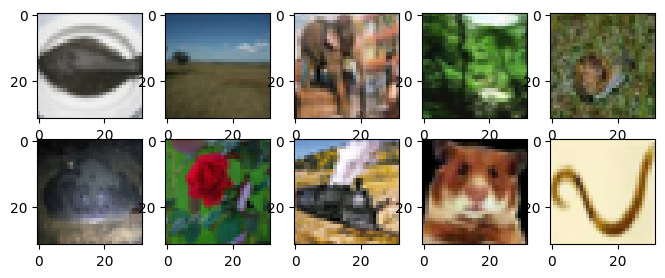

<Figure size 2000x2000 with 0 Axes>

In [ ]:
f,ax = plt.subplots(2,5,figsize=(8,3))
f = plt.figure(figsize=(20,20))
for i in range(5):
    for j in range(2):
        ax[j][i].imshow(features[np.random.randint(5000)])
plt.show()

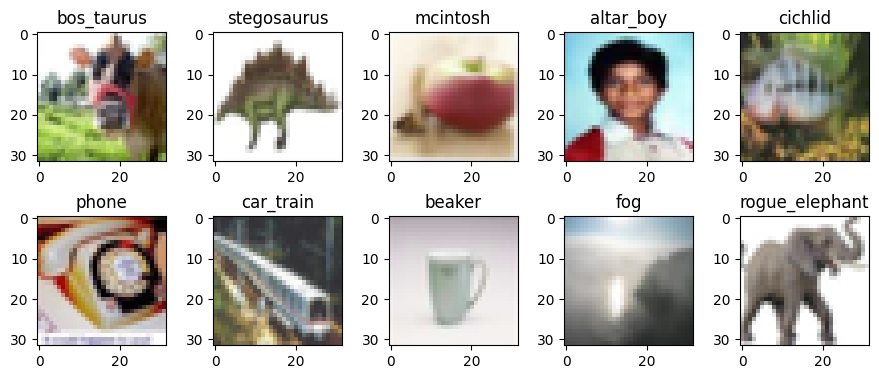

In [ ]:
f,ax = plt.subplots(2,5,figsize=(9,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.tight_layout()
    plt.imshow(features[i],cmap ='gray')
    plt.title(name_label[i])
plt.show()

## Image Transformation for Tensorflow (Keras) and Convolutional Neural Networks

Data Pre-processing

In [ ]:
#4D array input for building the CNN model using Keras
#transforming the training dataset
train_x = train_data['data']
train_x.shape

(50000, 3072)

In [ ]:
X_train = train_x.reshape(len(train_x),3,32,32).transpose(0,2,3,1)
X_train.shape

(50000, 32, 32, 3)

##transforming the testing dataset

In [ ]:
test_x = test_data['data']
X_test = test_x.reshape(len(test_x),3,32,32).transpose(0,2,3,1)
X_test.shape

(50000, 32, 32, 3)

In [ ]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)


Shape of X_train: (50000, 32, 32, 3)
Shape of X_test: (50000, 32, 32, 3)


##Trained labels and Test truth labels

In [ ]:
y_train = train_data['fine_labels']
#y_train

y_test = test_data['fine_labels']
#y_test

##Encoding of labels
This means that categorical data must be converted to a numerical form. If the categorical variable is an output variable, you may also want to convert predictions by the model back into a categorical form in order to present them or use them in some application.

In [ ]:
num_class = 100

y_train = keras.utils.to_categorical(y_train, num_class)
#y_train

y_test = keras.utils.to_categorical(y_test, num_class)
#y_test


## Rescaling by dividing every image pixel by 255

In [ ]:
# Normalization by dividing by 255
X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0

In [ ]:
model = Sequential()

#Stack 1
#convolution
model.add(Conv2D(filters=128, kernel_size=3, padding="same", activation="relu", input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=128, kernel_size=3, padding="same", activation="relu"))
#pooling
model.add(MaxPool2D(pool_size=2, strides=2))
#dropout
model.add(Dropout(0.2))

#Stack 2
#convolution
model.add(Conv2D(filters=256, kernel_size=3, padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=3, padding="same", activation="relu"))
#pooling
model.add(MaxPool2D(pool_size=2, strides=2))
#dropout
model.add(Dropout(0.5))
#Stack 3
#convolution
model.add(Conv2D(filters=512, kernel_size=3, padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=3, padding="same", activation="relu"))
#pooling
model.add(MaxPool2D(pool_size=2, strides=2))
#dropout
model.add(Dropout(0.5))

#flattening
model.add(Flatten())

#full connection
model.add(Dense(units=1000, activation="relu"))
#dropout
model.add(Dropout(0.5))

#full connection
model.add(Dense(units=1000, activation="relu"))
#dropout
model.add(Dropout(0.5))

#output layer
model.add(Dense(units=num_class, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 32, 32, 128)       3584      
                                                                 
 conv2d_20 (Conv2D)          (None, 32, 32, 128)       147584    
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 16, 16, 128)       0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 16, 16, 128)       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 16, 16, 256)       295168    
                                                                 
 conv2d_22 (Conv2D)          (None, 16, 16, 256)       590080    
                                                      

In [ ]:
# ## Training Convolutional Neural Network

epochs = 100
batch_size = 64

In [ ]:
from tensorflow.keras import optimizers

learning_rate = 0.0001  # Set your desired learning rate here

# Initialize your optimizer with the learning_rate parameter
optimizer = optimizers.Adam(learning_rate=learning_rate)

#model compiling
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#early stopping to monitor the validation loss and avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

#saving the model checkpoint for the best model
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True, verbose=1)

In [ ]:
#image augmentation to expand the training dataset
#validation split to test the model
data_gen = ImageDataGenerator(
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            featurewise_center=True,
            width_shift_range=0.1,
            validation_split=0.2)

data_gen.fit(X_train, seed=123)

train_data_gen = data_gen.flow(X_train, y_train,
                               batch_size=batch_size,
                               subset="training", seed=123)

valid_data_gen = data_gen.flow(X_train, y_train,
                               batch_size=batch_size,
                               subset="validation", seed=123)

In [ ]:
model_history = model.fit_generator(train_data_gen,
                          steps_per_epoch=40000//batch_size,
                          validation_data=valid_data_gen,
                          validation_steps=10000//batch_size,
                          callbacks=[early_stop, model_checkpoint],
                          verbose=1,
                          epochs=epochs)

Epoch 1/100


<ipython-input-77-ecdb339fa809>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history = model.fit_generator(train_data_gen,


625/625 [==============================] - ETA: 0s - loss: 3.5928 - accuracy: 0.1455
Epoch 1: val_loss improved from inf to 3.38176, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


625/625 [==============================] - 51s 76ms/step - loss: 3.5928 - accuracy: 0.1455 - val_loss: 3.3818 - val_accuracy: 0.1930
Epoch 2/100
625/625 [==============================] - ETA: 0s - loss: 3.4330 - accuracy: 0.1699
Epoch 2: val_loss improved from 3.38176 to 3.25130, saving model to best_model.h5
625/625 [==============================] - 45s 72ms/step - loss: 3.4330 - accuracy: 0.1699 - val_loss: 3.2513 - val_accuracy: 0.2082
Epoch 3/100
625/625 [==============================] - ETA: 0s - loss: 3.2770 - accuracy: 0.1961
Epoch 3: val_loss improved from 3.25130 to 3.08036, saving model to best_model.h5
625/625 [==============================] - 45s 71ms/step - loss: 3.2770 - accuracy: 0.1961 - val_loss: 3.0804 - val_accuracy: 0.2560
Epoch 4/100
625/625 [==============================] - ETA: 0s - loss: 3.1354 - accuracy: 0.2215
Epoch 4: val_loss improved from 3.08036 to 2.88798, saving model to best_model.h5
625/625 [==============================] - 44s 71ms/step - loss:

In [ ]:
# ## Visualizing the Loss and Accuracy
#plot to visualize the loss and accuracy against number of epochs
plt.figure(figsize=(18,8))

plt.suptitle('Loss and Accuracy Plots', fontsize=18)

plt.subplot(1,2,1)
plt.plot(model_history.history['loss'], label='Training Loss')
plt.plot(model_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Number of epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)

plt.subplot(1,2,2)
plt.plot(model_history.history['accuracy'], label='Train Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Number of epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.show()

In [ ]:
# ## Model Evaluation

#train_loss, train_accuracy = model.evaluate_generator(generator=train_data_gen, steps=40000//batch_size)
valid_loss, valid_accuracy = model.evaluate_generator(generator=valid_data_gen, steps=10000//batch_size)
test_loss, test_accuracy = model.evaluate_generator(data_gen.flow(X_test, y_test, seed=123), steps=len(X_test)//batch_size)

print('Validation Accuracy: ', round((valid_accuracy * 100), 2), "%")
print('Test Accuracy: ', round((test_accuracy * 100), 2), "%")
print(" ")
print('Validation Loss: ', round(valid_loss, 2))
print('Test Loss: ', round(test_loss, 2))

In [ ]:
# ## Confusion Matrix

y_pred = model.predict(X_test)

cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
print(cm)

In [ ]:
#report to see which category has been predicted incorectly and which has been predicted correctly
target = ["Category {}".format(i) for i in range(num_class)]
print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), target_names=target))

In [ ]:
# ## Visualizing the Predictions

#dataframe of predictions
prediction = np.argmax(y_pred, axis=1)
prediction = pd.DataFrame(prediction)
#prediction


In [ ]:
#generating a random number to display a random image from the dataset along with the true and predicted label
imageId = np.random.randint(0, len(X_test))

rcParams['figure.figsize'] = 2,2

plt.imshow(X_test[imageId])

plt.axis('off')

print("True Label: " + str(subCategory.iloc[test_data['fine_labels'][imageId]][0].capitalize()))
print("Predicted Label: " + str(subCategory.iloc[prediction.iloc[imageId]]).split()[2].capitalize())

In [ ]:
#16 random images to display at a time along with their true and random labels
rcParams['figure.figsize'] = 12,15

num_row = 4
num_col = 4

imageId = np.random.randint(0, len(X_test), num_row * num_col)

fig, axes = plt.subplots(num_row, num_col)

for i in range(0, num_row):
    for j in range(0, num_col):
        k = (i*num_col)+j
        axes[i,j].imshow(X_test[imageId[k]])
        axes[i,j].set_title("True: " + str(subCategory.iloc[test_data['fine_labels'][imageId[k]]][0]).capitalize()
                             + "\nPredicted: " + str(subCategory.iloc[prediction.iloc[imageId[k]]]).split()[2].capitalize(),
                            fontsize=14)
        axes[i,j].axis('off')
        fig.suptitle("Images with True and Predicted Labels", fontsize=18)

plt.show()

In [ ]:
# ## Testing the Model

#function to resize the image
def resize_test_image(test_img):

    img = cv2.imread(test_img)
    #plt.imshow(img)
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #plt.imshow(img_RGB)
    resized_img = cv2.resize(img_RGB, (32, 32))
    #plt.imshow(resized_img)
    resized_img = resized_img / 255.
    #plt.imshow(resized_img)
    return resized_img

#resize_test_image('/content/orange.jpg')

In [ ]:
#function to get prediction for test image from the model
def predict_test_image(test_img):

    resized_img = resize_test_image(test_img)
    prediction = model.predict(np.array([resized_img]))

    return prediction

#predict_test_image('/content/orange.jpg')

In [ ]:
#function to get the sorted prediction
def sort_prediction_test_image(test_img):

    prediction = predict_test_image(test_img)

    index = np.arange(0,100)

    for i in range(100):
        for j in range(100):
            if prediction[0][index[i]] > prediction[0][index[j]]:
                temp = index[i]
                index[i] = index[j]
                index[j] = temp

    return index

#sort_prediction_test_image('/content/orange.jpg')

In [ ]:
#function to get the dataframe for top 5 predictions
def df_top5_prediction_test_image(test_img):

    sorted_index = sort_prediction_test_image(test_img)
    prediction = predict_test_image(test_img)

    subCategory_name = []
    prediction_score = []

    k = sorted_index[:6]

    for i in range(len(k)):
        subCategory_name.append(subCategory.iloc[k[i]][0])
        prediction_score.append(round(prediction[0][k[i]], 2))

    df = pd.DataFrame(list(zip(subCategory_name, prediction_score)), columns=['Label', 'Probability'])

    return df

df_top5_prediction_test_image('/content/orange.jpg')